<a href="https://colab.research.google.com/github/Aishaamalik/Page-View-Time-Series-Visualizer/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Page View Time Series Visualizer**

 Please upload your fcc-forum-pageviews.csv file


Saving fcc-forum-pageviews.csv to fcc-forum-pageviews (3).csv
DataFrame shape: (1304, 1)
            value
date             
2016-05-09   1335
2016-05-10   1206
2016-05-11   1361
2016-05-12   1534
2016-05-13   1180
 Cleaned DataFrame shape: (1238, 1)
 Generating Line Plot...


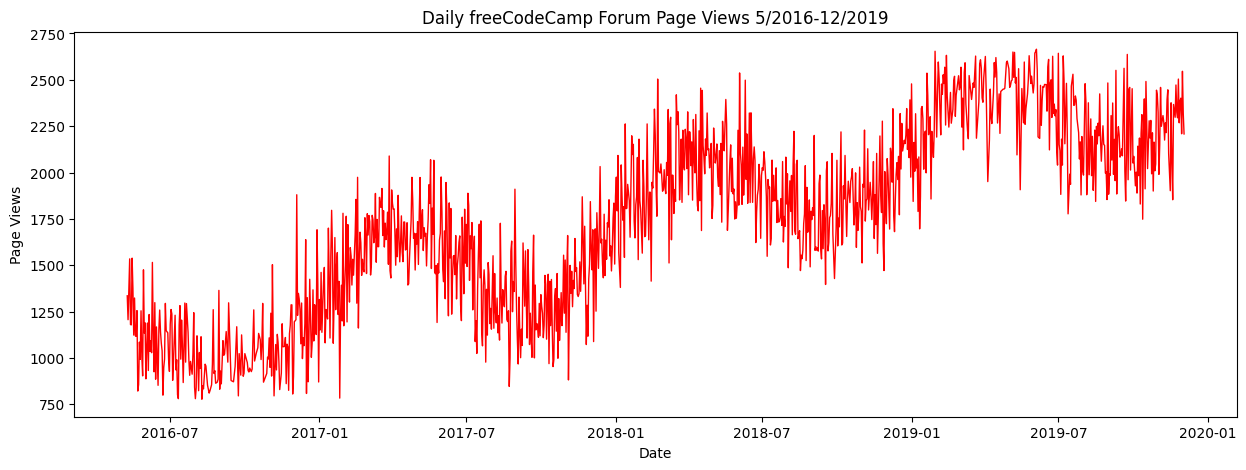

 Generating Bar Plot...


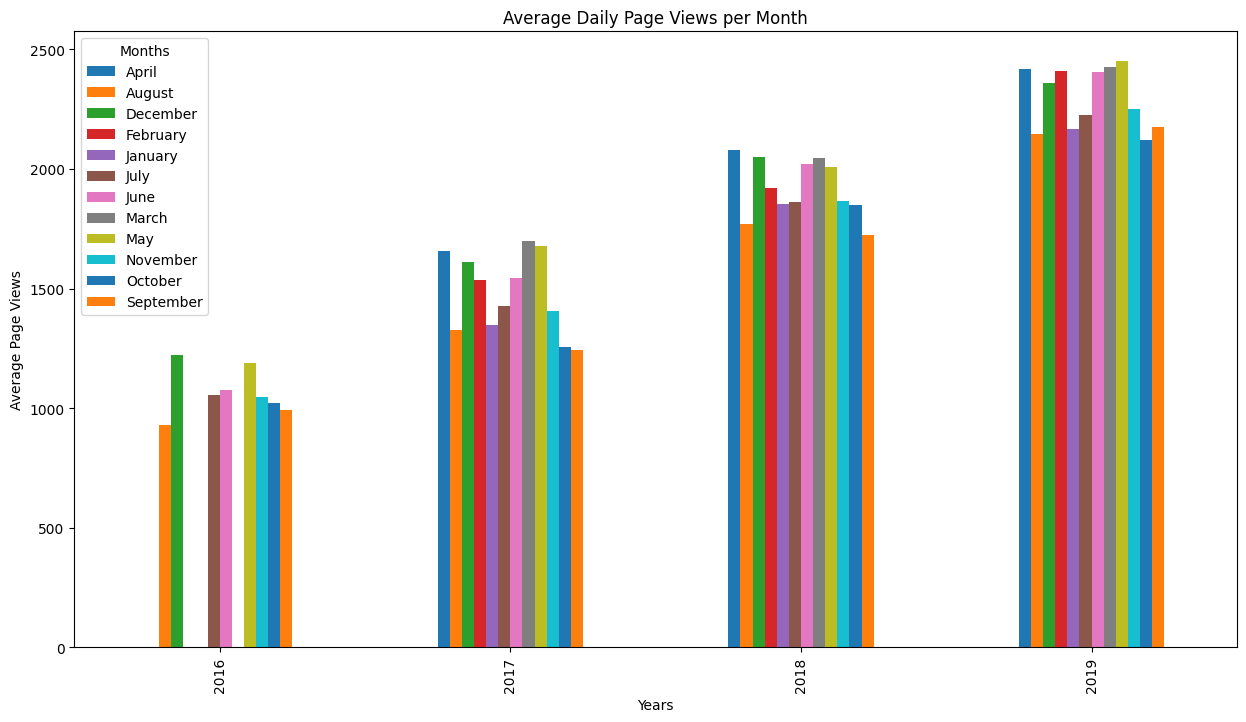

 Generating Box Plots...


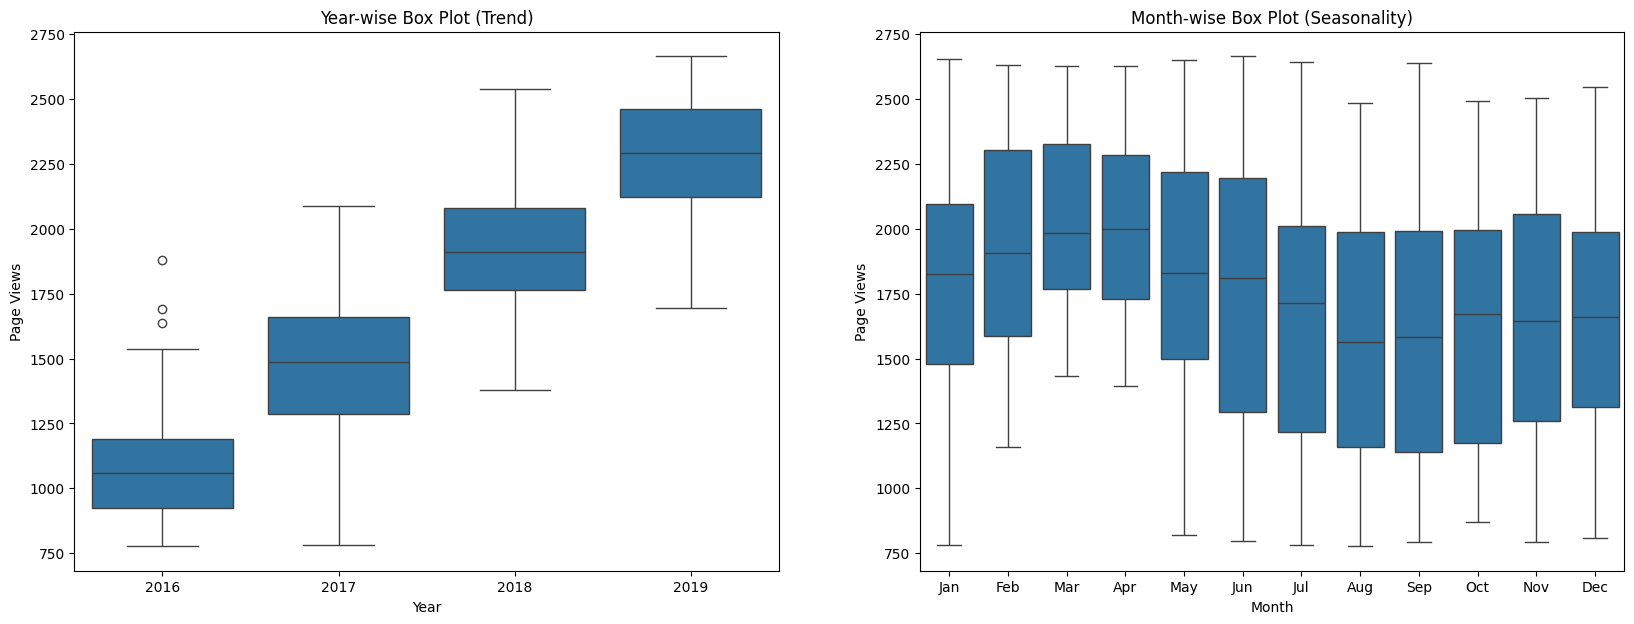

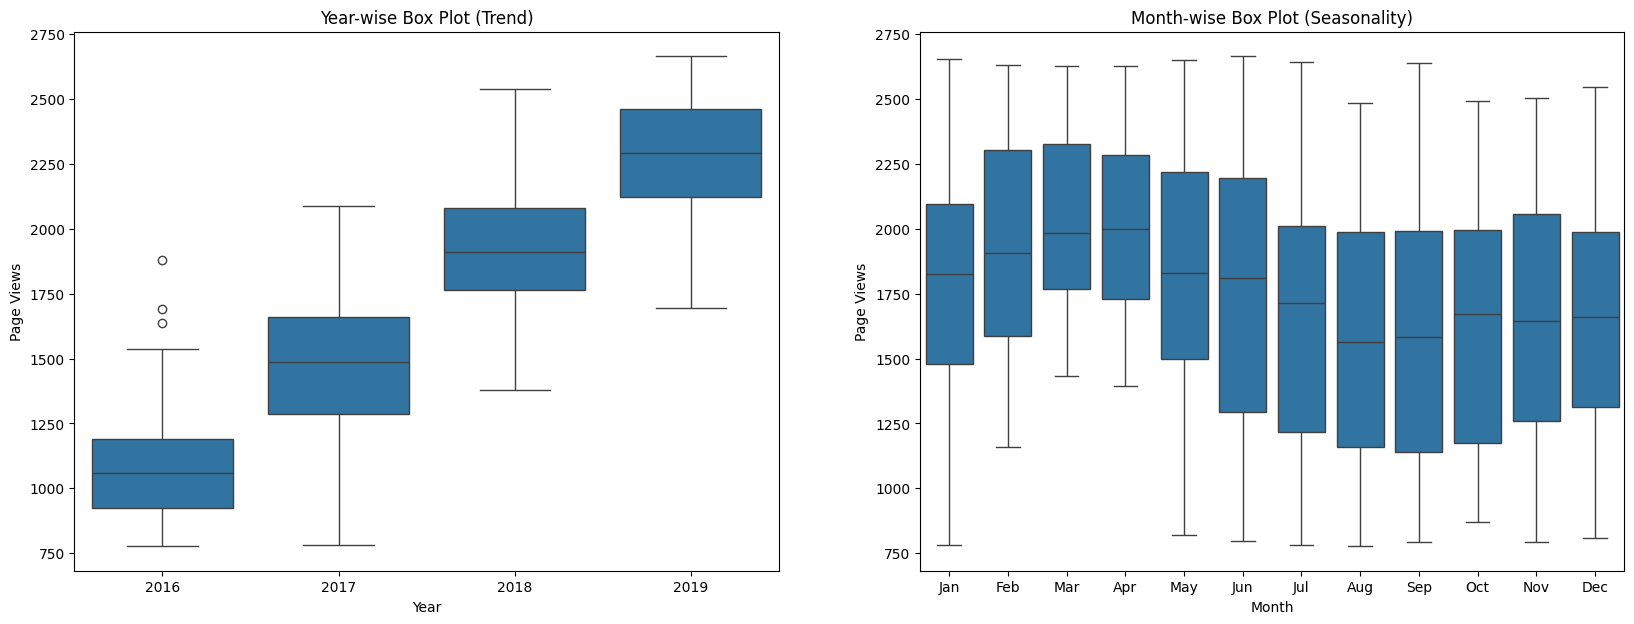

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


print(" Please upload your fcc-forum-pageviews.csv file")
from google.colab import files
uploaded = files.upload()

import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]), parse_dates=['date'], index_col='date')

print("DataFrame shape:", df.shape)
print(df.head())

low = df['value'].quantile(0.025)
high = df['value'].quantile(0.975)
df_clean = df[(df['value'] >= low) & (df['value'] <= high)]

print(" Cleaned DataFrame shape:", df_clean.shape)

def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df_clean.index, df_clean['value'], color='red', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    plt.show()
    return fig


def draw_bar_plot():
    df_bar = df_clean.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    fig = df_grouped.plot(kind='bar', figsize=(15,8)).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.title('Average Daily Page Views per Month')
    plt.legend(title='Months')
    plt.show()
    return fig

def draw_box_plot():
    df_box = df_clean.copy().reset_index()
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month

    df_box = df_box.sort_values('month_num')

    fig, axes = plt.subplots(1, 2, figsize=(20, 7))

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1],
                order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    plt.show()
    return fig

print(" Generating Line Plot...")
draw_line_plot()

print(" Generating Bar Plot...")
draw_bar_plot()

print(" Generating Box Plots...")
draw_box_plot()
